# 0. DEPENDENCIES

Fix for Jupyter Notebook imports:

In [37]:
import os
import sys

print(os.getcwd())

# sys.path.append("S:\Dropbox\\000 - CARND\CarND-T1-P5-Vehicle-Detection")

for path in sys.path: print(path)

S:\Dropbox\000 - CARND\CarND-T1-P5-Vehicle-Detection\src\notebooks

C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\python35.zip
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\DLLs
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\cycler-0.10.0-py3.5.egg
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\IPython\extensions
C:\Users\gmzco\.ipython
S:\Dropbox\000 - CARND\CarND-T1-P5-Vehicle-Detection


Remove the additional entry if needed:

In [38]:
# sys.path = sys.path[:-1]

for path in sys.path: print(path)


C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\python35.zip
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\DLLs
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\cycler-0.10.0-py3.5.egg
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\IPython\extensions
C:\Users\gmzco\.ipython
S:\Dropbox\000 - CARND\CarND-T1-P5-Vehicle-Detection


Load all dependencies:

In [39]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import pickle

from importlib import reload
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split


import src.helpers.overlays as OV
import src.helpers.plot as PLT
import src.helpers.io as IO
import src.helpers.windows as WIN
import src.helpers.constants as C

# RELOAD:

reload(OV)
reload(PLT)
reload(IO)
reload(WIN)
reload(C)


<module 'src.helpers.constants' from 'S:\\Dropbox\\000 - CARND\\CarND-T1-P5-Vehicle-Detection\\src\\helpers\\constants.py'>

# 1. LOAD TEST IMAGES

Load all 8 test images (the default 6 and 2 more other with cars closer to our own).

In [40]:

imgs = IO.load_images_rgb(glob.glob("../../input/images/test/*.jpg"))

# Get some basic data:

anyImg = imgs[0]

HEIGHT, WIDTH, CHANNELS = anyImg.shape

CENTER =  WIDTH // 2
MIDDLE = HEIGHT // 2


Preview them:

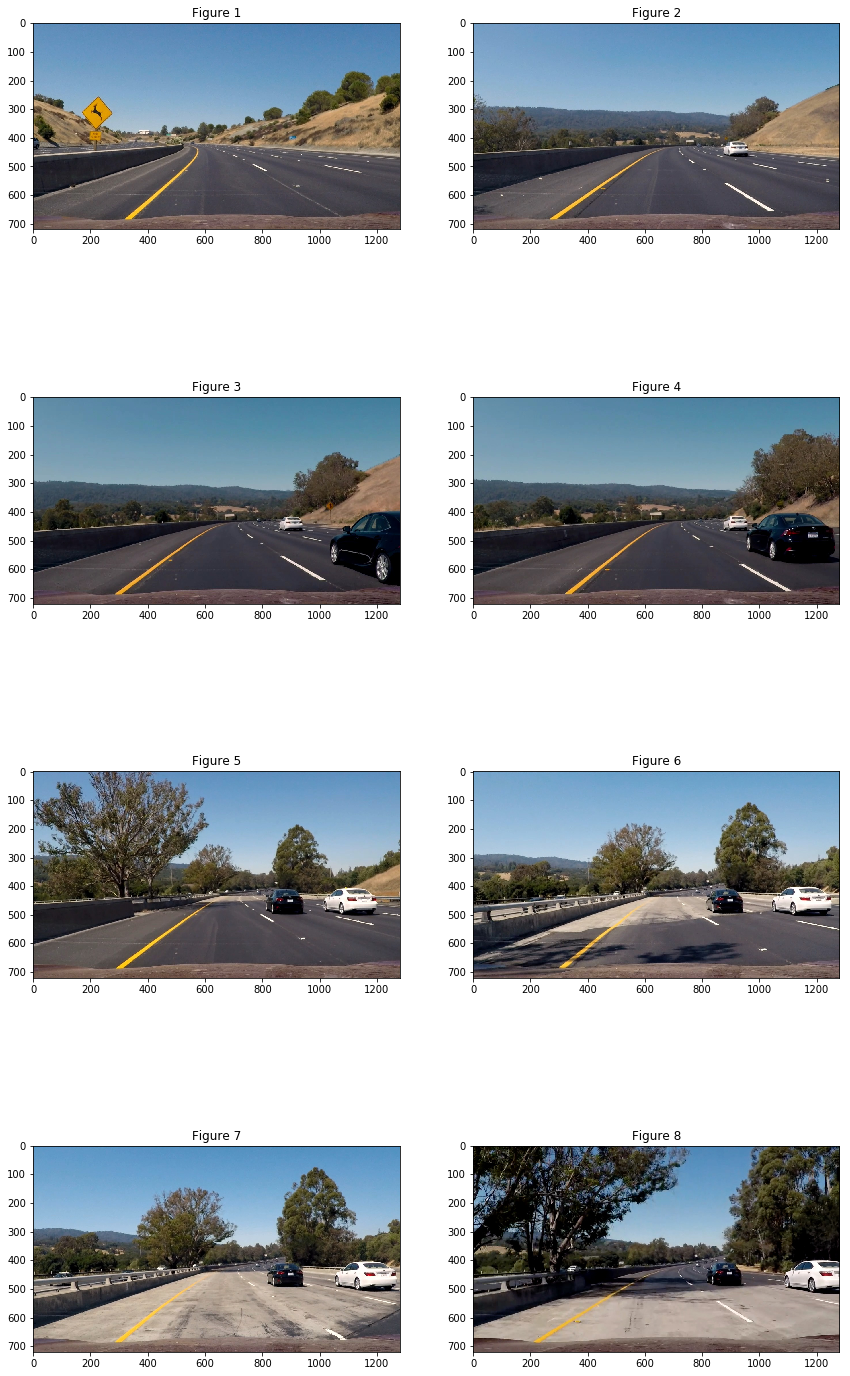

In [41]:

# TODO: UPDATE GRIDS!

PLT.showAll(imgs, 2)


# 2. CREATE AND ADJUST THE SLIDING WINDOWS

We will consider windows of different dimensions in different portions of the images, although all of them will extend to the whole width of the image.

Not searching for cars in the sides of the image might seem a good idea seeing these images, but in different roads or conditions (sharper turns, wider roads, being on a different lane...) there might be cars there too. However, restricting the search area or adjusting the window sizes is a good idea, but that would need to be done dinamically based on some other information we don't have available right now (steering angle, width of the road/number of lanes, lenght of the road (LiDAR?)...

We will consider 4 window sizes:


In [42]:
# TODO: Maybe 32 and/or 48 too?


# XS - 64 px
windows_xs = WIN.slide_window(0, WIDTH, 400, 528, (64, 64), (0.5, 0.5))

# S - 96 px
windows_s = WIN.slide_window(0, WIDTH, 400, 544, (96, 96))

# M - 128 px
windows_m = WIN.slide_window(0, WIDTH, 400, 592, (128, 128))


# Colors to plot each of them:

COLOR_XS = (255, 255, 255)
COLOR_S = (0, 0, 255)
COLOR_M = (255, 0, 0)


All these windows, merged into a single array, are available in windows.py WINDOWS(WIDHT) function:

In [43]:
print("TOTAL WINDOWS = {}".format(len(C.WINDOWS(WIDTH))))

TOTAL WINDOWS = 378


__EXTRA SMALL:__

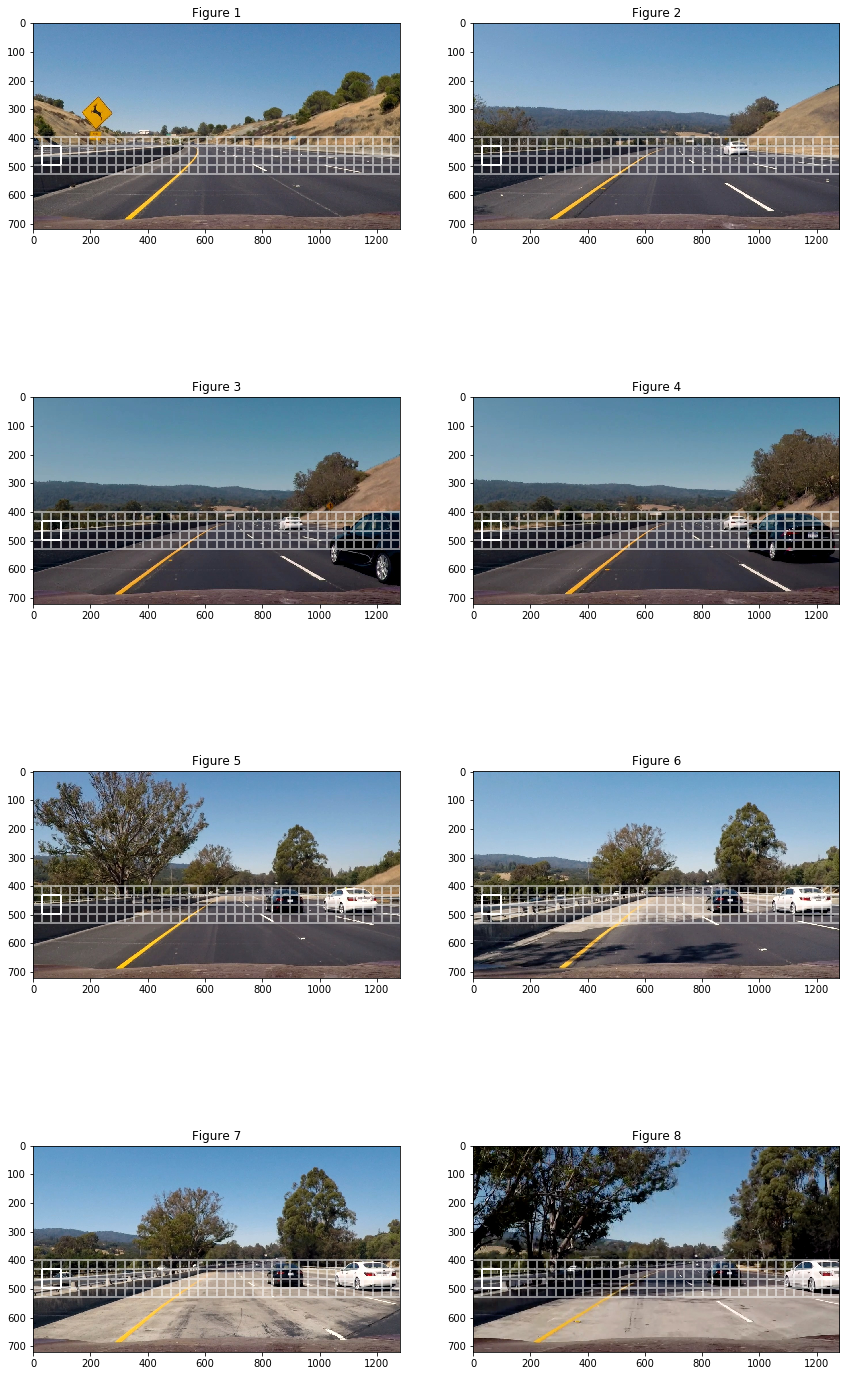

In [44]:

PLT.showAll([OV.draw_boxes(OV.draw_boxes(img, windows_xs, COLOR_XS, 0.5), [windows_xs[4]], COLOR_XS, 1) for img in imgs], 2)


__SMALL:__

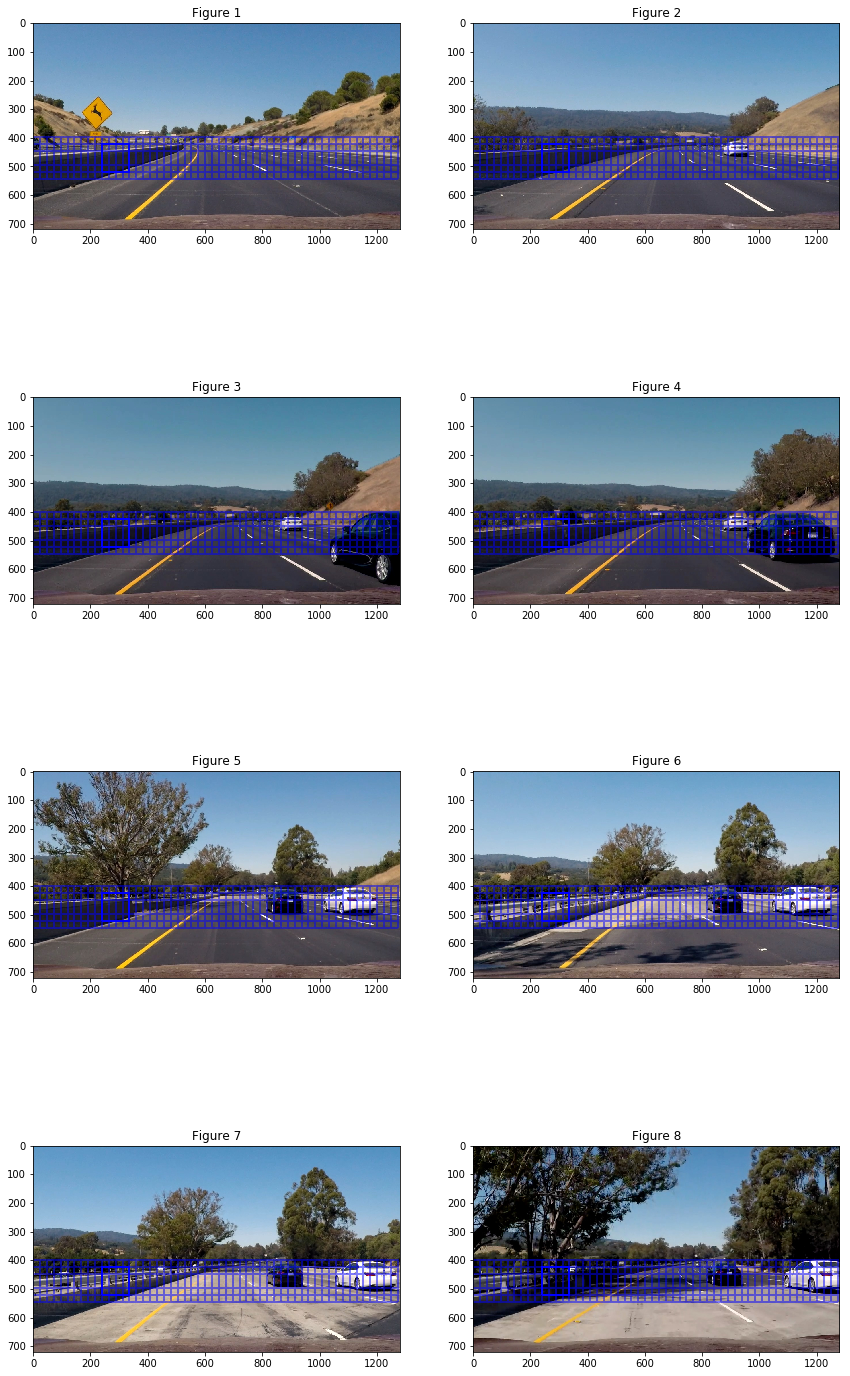

In [45]:

PLT.showAll([OV.draw_boxes(OV.draw_boxes(img, windows_s, COLOR_S, 0.5), [windows_s[31]], COLOR_S, 1) for img in imgs], 2)


__MEDIUM:__

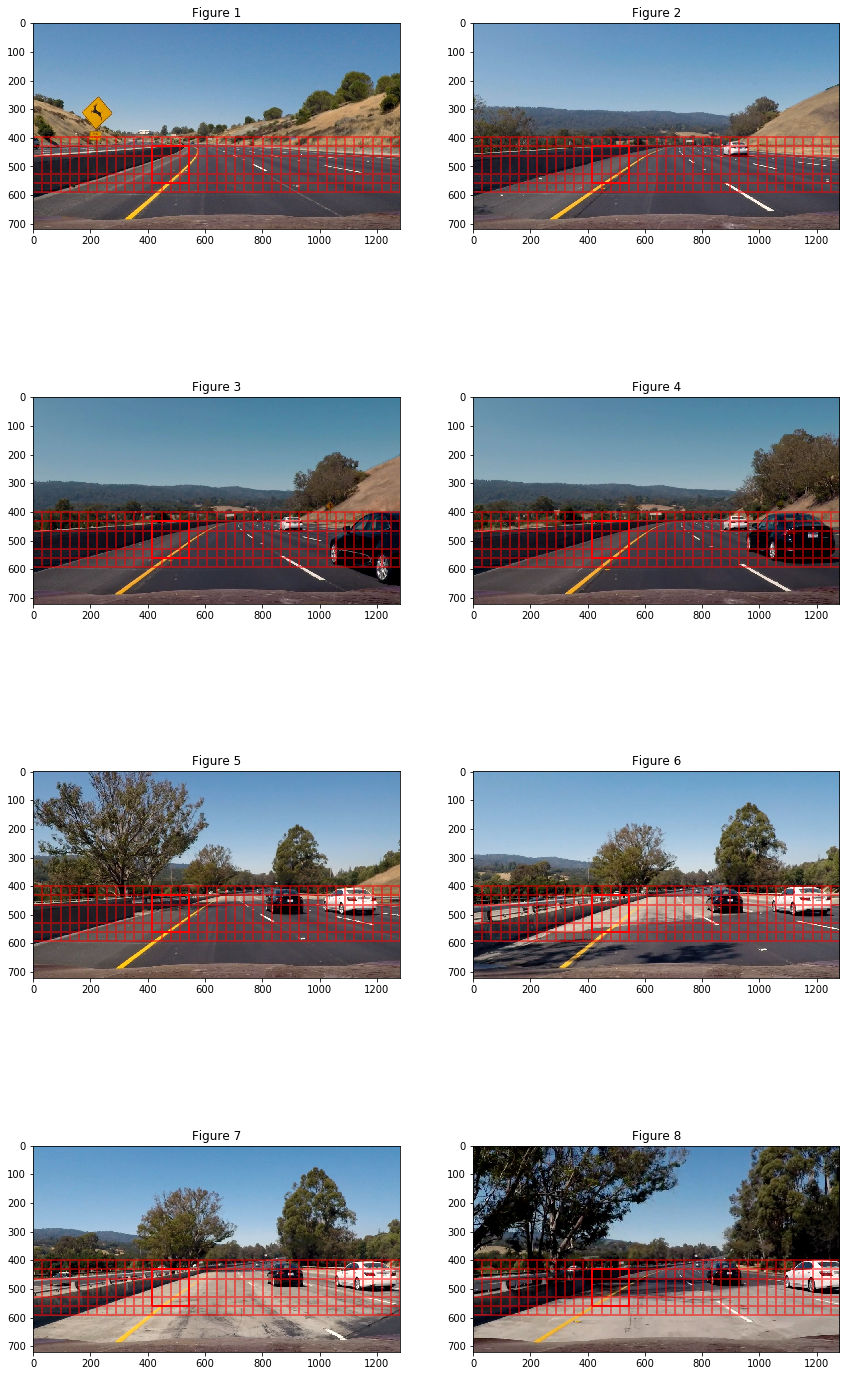

In [46]:

PLT.showAll([OV.draw_boxes(OV.draw_boxes(img, windows_m, COLOR_M, 0.5), [windows_m[40]], COLOR_M, 1) for img in imgs], 2)


# 3. FINAL VISUALIZATION

This is the whole set of windows that will be considered:

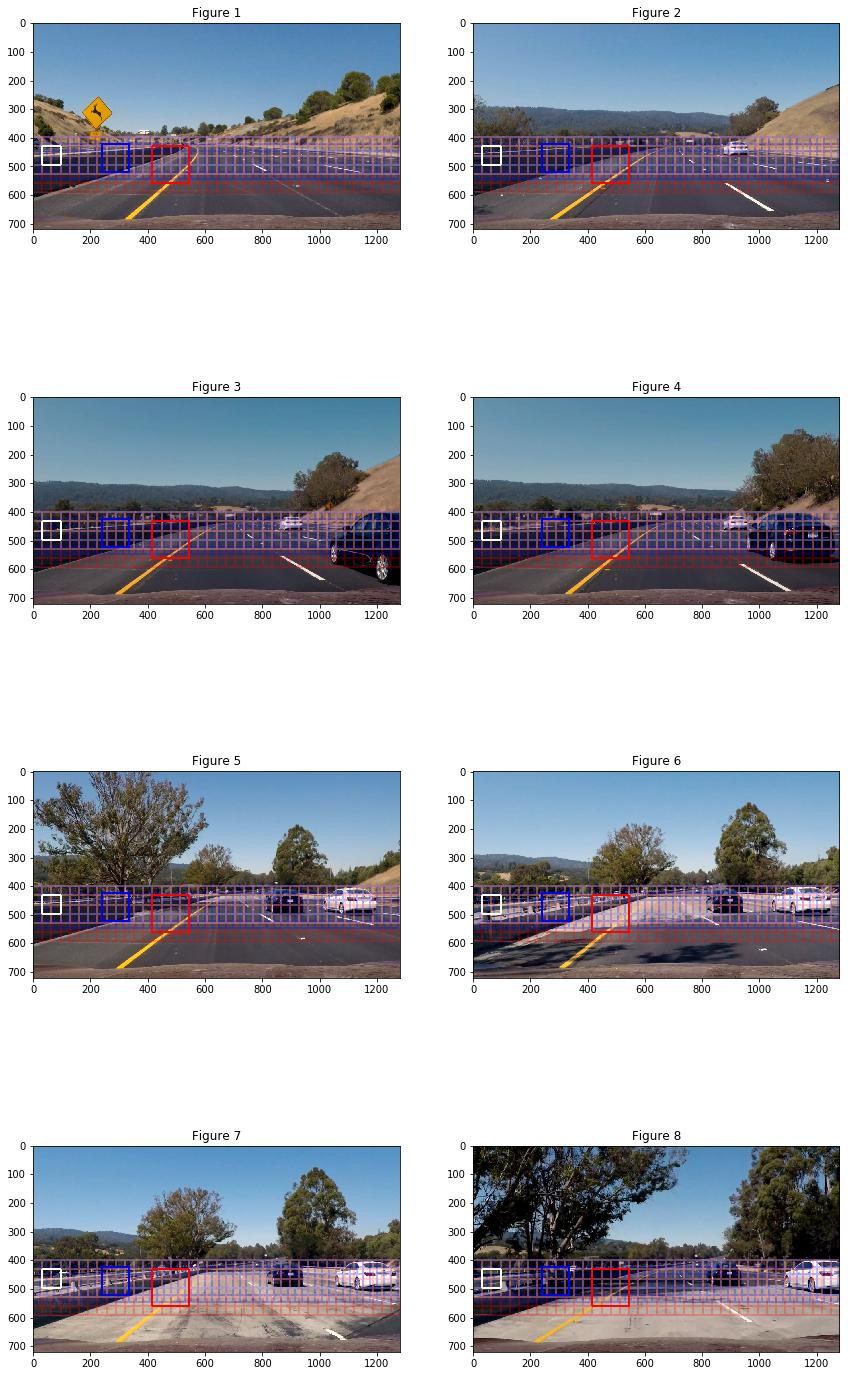

In [48]:

all_windows = []

for img in imgs:
    img = OV.draw_boxes(img, windows_m, COLOR_M, 0.25)
    img = OV.draw_boxes(img, windows_s, COLOR_S, 0.25)
    img = OV.draw_boxes(img, windows_xs, COLOR_XS, 0.25)
    
    img = OV.draw_boxes(img, [windows_m[40]], COLOR_M, 1)  
    img = OV.draw_boxes(img, [windows_s[31]], COLOR_S, 1)
    img = OV.draw_boxes(img, [windows_xs[4]], COLOR_XS, 1)  
    
    all_windows.append(img)
    
    
PLT.showAll(all_windows, 2)


In [49]:

# Save some images for the write up:

img1 = OV.draw_boxes(imgs[2], windows_m, COLOR_M, 0.25)
img2 = OV.draw_boxes(imgs[2], windows_s, COLOR_S, 0.25)
img3 = OV.draw_boxes(imgs[2], windows_xs, COLOR_XS, 0.25)

img1 = OV.draw_boxes(img1, [windows_m[40]], COLOR_M, 1)  
img2 = OV.draw_boxes(img2, [windows_s[31]], COLOR_S, 1)
img3 = OV.draw_boxes(img3, [windows_xs[4]], COLOR_XS, 1)  

cv2.imwrite("../../output/images/XS Grid.jpg", cv2.cvtColor(img3, cv2.COLOR_RGB2BGR))
cv2.imwrite("../../output/images/S Grid.jpg", cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))
cv2.imwrite("../../output/images/M Grid.jpg", cv2.cvtColor(img1, cv2.COLOR_RGB2BGR))
cv2.imwrite("../../output/images/All Grids.jpg", cv2.cvtColor(all_windows[2], cv2.COLOR_RGB2BGR))


True